In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

In [118]:
# Importing dataset and examining it
dataset = pd.read_csv("C:\\Users\elang\Desktop\Sanjay\Data Visualization\customers.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [119]:
# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')

'corrheatmap.html'

In [120]:
# Dropping columns with high correlation + causation
dataset = dataset.drop(['tenure','MonthlyCharges', 'TotalCharges'], axis = 1)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7032 non-null   object
 1   SeniorCitizen     7032 non-null   int64 
 2   Partner           7032 non-null   object
 3   Dependents        7032 non-null   object
 4   PhoneService      7032 non-null   object
 5   MultipleLines     7032 non-null   object
 6   InternetService   7032 non-null   object
 7   OnlineSecurity    7032 non-null   object
 8   OnlineBackup      7032 non-null   object
 9   DeviceProtection  7032 non-null   object
 10  TechSupport       7032 non-null   object
 11  StreamingTV       7032 non-null   object
 12  StreamingMovies   7032 non-null   object
 13  Contract          7032 non-null   object
 14  PaperlessBilling  7032 non-null   object
 15  PaymentMethod     7032 non-null   object
dtypes: int64(1), object(15)
memory usage: 879.1+ KB
None


In [121]:
# Converting Categorical features into Numerical features
categorical_features = ['gender', 'Partner', 'Dependents', 'StreamingTV', 'StreamingMovies', 'PhoneService', 'MultipleLines','InternetService',
'Contract','PaperlessBilling','PaymentMethod','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']
final_data = pd.get_dummies(dataset, columns = categorical_features)
print(final_data.info())
print(final_data.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   SeniorCitizen                            7032 non-null   int64
 1   gender_Female                            7032 non-null   uint8
 2   gender_Male                              7032 non-null   uint8
 3   Partner_No                               7032 non-null   uint8
 4   Partner_Yes                              7032 non-null   uint8
 5   Dependents_No                            7032 non-null   uint8
 6   Dependents_Yes                           7032 non-null   uint8
 7   StreamingTV_No                           7032 non-null   uint8
 8   StreamingTV_No internet service          7032 non-null   uint8
 9   StreamingTV_Yes                          7032 non-null   uint8
 10  StreamingMovies_No                       7032 non-null   uint8
 11  Stre

In [123]:
# Dividing data into subsets
#Personal Data
subset1 = final_data[['gender_Male','gender_Female','Partner_Yes','Partner_No','Dependents_Yes','Dependents_No',
                      'SeniorCitizen']]


In [124]:
subset2 = final_data[['PhoneService_Yes','PhoneService_No',
                      'MultipleLines_Yes','MultipleLines_No','MultipleLines_No phone service',
                      'InternetService_DSL','InternetService_Fiber optic','InternetService_No',
                      'Contract_Month-to-month','Contract_One year','Contract_Two year',
                      'PaperlessBilling_Yes','PaperlessBilling_No',
                      'PaymentMethod_Electronic check','PaymentMethod_Mailed check',
                      'PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)']]


In [125]:
subset3 = final_data[['OnlineSecurity_Yes','OnlineSecurity_No','OnlineSecurity_No internet service',
                      'OnlineBackup_Yes','OnlineBackup_No','OnlineBackup_No internet service',
                      'DeviceProtection_Yes','DeviceProtection_No','DeviceProtection_No internet service',
                      'TechSupport_Yes','TechSupport_No','TechSupport_No internet service','StreamingTV_Yes','StreamingTV_No','StreamingTV_No internet service','StreamingMovies_Yes',
                      'StreamingMovies_No','StreamingMovies_No internet service',]]

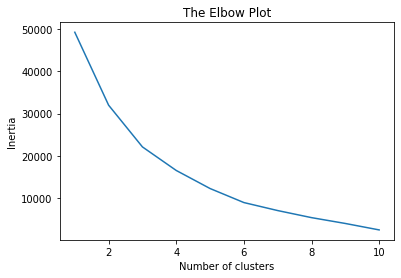

In [126]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X1 = feature_scaler.fit_transform(subset1)
X2 = feature_scaler.fit_transform(subset2)
X3 = feature_scaler.fit_transform(subset3)


# Analysis on subset1 - Personal Data
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [127]:
# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity =30,n_iter=2000)
x_tsne = tsne.fit_transform(X1)

gender = list(dataset['gender'])
Partner = list(dataset['Partner'])
Dependents = list(dataset['Dependents'])
SeniorCitizen = list(dataset['SeniorCitizen'])


data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'gender: {a}; Partner: {b}; Dependents:{c}, SeniorCitizen:{d}' for a,b,c,d in list(zip(gender,Partner,Dependents,SeniorCitizen))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE1.html')

't-SNE1.html'

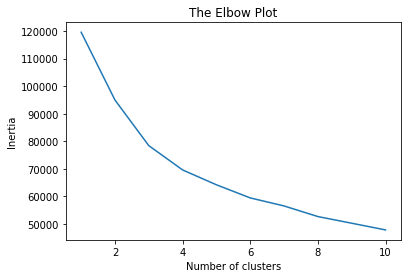

In [130]:
#Analysis on subset2 - Work Data
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [128]:
# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity =30,n_iter=2000)
x_tsne = tsne.fit_transform(X2)

PhoneService= list(dataset['PhoneService'])
MultipleLines = list(dataset['MultipleLines'])
InternetService = list(dataset['InternetService'])
Contract = list(dataset['Contract'])
PaperlessBilling = list(dataset['PaperlessBilling'])
PaymentMethod=list(dataset['PaymentMethod'])



data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'PhoneService: {a}; MultipleLines: {b}; InternetService:{c}, Contract:{d},PaperlessBilling:{e},PaymentMethod:{f}' for a,b,c,d,e,f in list(zip(PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 1000, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE3.html')

't-SNE3.html'

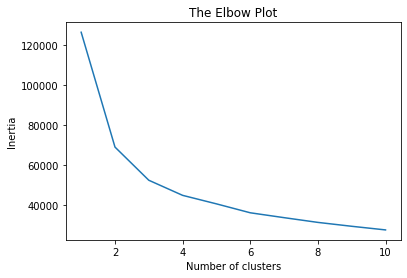

In [131]:
# Analysis on subset3 - Churn Factos
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X3)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [133]:
# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity =30,n_iter=2000)
x_tsne = tsne.fit_transform(X3)

OnlineSecurity= list(dataset['OnlineSecurity'])
OnlineBackup = list(dataset['OnlineBackup'])
DeviceProtection = list(dataset['DeviceProtection'])
TechSupport = list(dataset['TechSupport'])
StreamingTV = list(dataset['StreamingTV'])
StreamingMovies = list(dataset['StreamingMovies'])

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'OnlineSecurity: {a}; OnlineBackup: {b}; DeviceProtection:{c}, TechSupport:{d},StreamingTV:{e},StreamingMovies:{f}' for a,b,c,d,e,f in list(zip(OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 1000, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE3.html')

't-SNE3.html'